In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root")
f.cd()
f.ls()

TFile**		./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root	
 TFile*		./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root	
  KEY: TH3D	corrected;1	corrected


[(-0.0001790398398147806, 1.8070787342438627e-07, 2913.32505902203, 0.6497597804328678, 0), (-0.00028403737026637865, 2.643253683170955e-07, 2738.9549546227818, 0.42926040569983687, 1), (-0.0002897543423717031, 2.3771500181445483e-07, 2750.2315397974908, 0.3880971860844092, 2), (-0.0002636034497377619, 2.2647197556540914e-07, 2769.021264868854, 0.4236674799975715, 3), (-0.0003517773750589528, 2.6973774240460847e-07, 2692.5487716225257, 0.3149485526574537, 4), (-0.0002790128726968586, 2.3291261449290646e-07, 2754.0856721618475, 0.3982916456590354, 5), (-0.00023296802735357926, 2.1174237536878107e-07, 2806.763383899282, 0.4843858590507847, 6), (-0.00027886013010088804, 2.3089092190791863e-07, 2756.265916105469, 0.39703800453329835, 7), (-0.000289436405257219, 2.432446672810562e-07, 2737.4628836146762, 0.38629293294717965, 8), (-0.00023479361668192394, 2.111787542689197e-07, 2807.840937101068, 0.4802887571354498, 9), (-0.00021190741225364014, 1.9889940662569834e-07, 2852.7592304780796, 0.

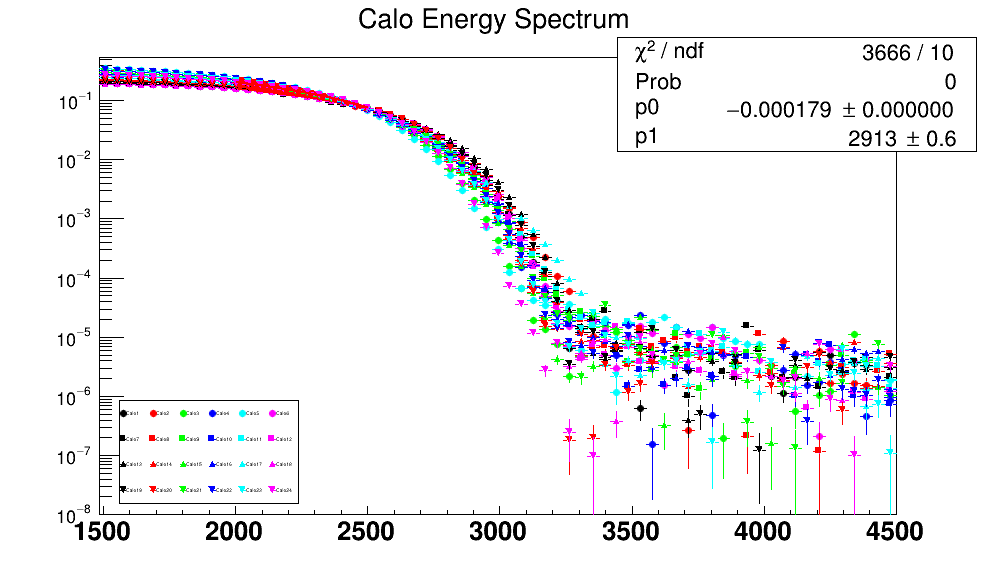

In [3]:
c = r.TCanvas('c','c',1000,600)
r.gStyle.SetOptStat(0)

fitTuple = []

leg = r.TLegend(0.12,0.12,0.3,0.3)
calo_especs = []
wiggle  = f.Get('corrected').Clone("wiggle")
wiggle.GetListOfFunctions().Clear()
endpoint_fit = r.TF1("endpoint_fit", '[0]*(x-[1])', 2000,2500)

for i in range(24):
    wiggle.GetZaxis().SetRange(i+1,i+1)
    wiggle.GetYaxis().SetRange(0,300)
    wiggle.GetXaxis().SetRange(300,1200)
    calo_especs.append(wiggle.Project3D('y_{}'.format(i+1)))
    calo_especs[i].Rebin(3)
    calo_especs[i].SetTitle('Calo Energy Spectrum')
    calo_especs[i].GetXaxis().SetRangeUser(500,3000)
    calo_especs[i].SetMarkerSize(0.8)
    calo_especs[i].SetMarkerStyle(int(i/6)+20)
    calo_especs[i].Scale(1./calo_especs[i].GetEntries())
    calo_especs[i].GetYaxis().SetRangeUser(0.001,0.042)
    if i==0:
        calo_especs[i].Draw('EP')
    else:
        calo_especs[i].Draw('EP same')
  
    calo_especs[i].SetMarkerColor(i%6+1)
    calo_especs[i].SetLineColor(i%6+1)
    if (i%6+1) == 5:
        calo_especs[i].SetMarkerColor(7)
        calo_especs[i].SetLineColor(7)

    calo_especs[i].Scale(1./calo_especs[i].Integral(50,200))
    calo_especs[i].GetYaxis().SetRangeUser(0.00000001,0.542)
    calo_especs[i].GetXaxis().SetRangeUser(1500,4500)

    leg.AddEntry(calo_especs[i], 'Calo{}'.format(i+1), 'lp')
    
    endpoint_fit.SetParameters(-10,3000)
    calo_especs[i].Fit("endpoint_fit","R")
    endpoint_fit.Draw("SAME")
    
    fitTuple.append((endpoint_fit.GetParameter(0),endpoint_fit.GetParError(0),endpoint_fit.GetParameter(1),endpoint_fit.GetParError(1), i))

leg.SetNColumns(6)
leg.Draw()
c.SetLogy(1)
c.Draw()

print(fitTuple)

2913.32505902203
2738.9549546227818
2750.2315397974908
2769.021264868854
2692.5487716225257
2754.0856721618475
2806.763383899282
2756.265916105469
2737.4628836146762
2807.840937101068
2852.7592304780796
2948.8361596563273
2909.3673663202667
2872.137056880132
2781.614724756614
2765.0038999234685
2828.189872199973
2930.634233043481
2860.279010553704
2855.440444186839
2745.221284986995
2699.5608207928644
2738.8324110945773
2795.524617950443


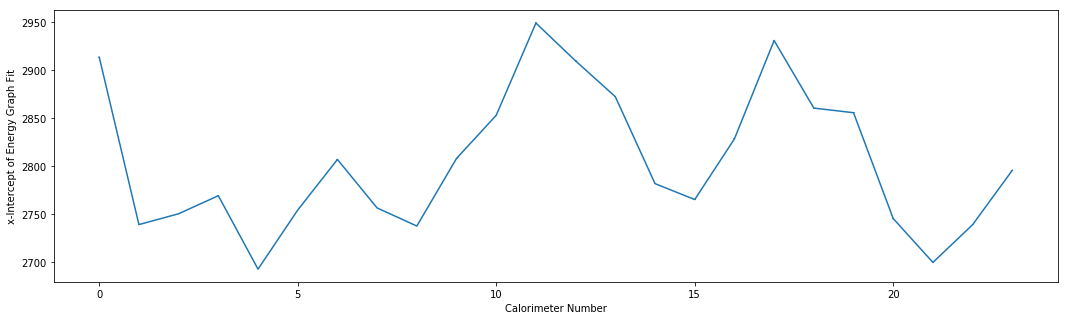

In [4]:
yIntList = []
xIntList = []
yIntErrorList = []
xIntErrorList = []
xList = []

for entry in fitTuple:
    yInt = entry[0]*entry[2]*-1
    xInt = entry[2]
    print(xInt)
    yIntList.append(yInt)
    xIntList.append(xInt)
    yIntErrorList.append(entry[1])
    xIntErrorList.append(entry[3])
    xList.append(entry[4])
    
fig, ax = plt.subplots(figsize=(18, 5))
ax.errorbar(y=xIntList,x = xList,yerr=xIntErrorList)
ax.set_xlabel('Calorimeter Number')
ax.set_ylabel('x-Intercept of Energy Graph Fit')

plt.show()

In [5]:
print(calo_especs)

[<ROOT.TH1D object ("wiggle_y_1") at 0x7fffeea56c70>, <ROOT.TH1D object ("wiggle_y_2") at 0x7fffee522a40>, <ROOT.TH1D object ("wiggle_y_3") at 0x7fffeec3d900>, <ROOT.TH1D object ("wiggle_y_4") at 0x7fffee523e20>, <ROOT.TH1D object ("wiggle_y_5") at 0x7fffeec45690>, <ROOT.TH1D object ("wiggle_y_6") at 0x7fffeec4d4a0>, <ROOT.TH1D object ("wiggle_y_7") at 0x7fffee522200>, <ROOT.TH1D object ("wiggle_y_8") at 0x7fffeec41cf0>, <ROOT.TH1D object ("wiggle_y_9") at 0x7fffeec22a80>, <ROOT.TH1D object ("wiggle_y_10") at 0x7fffeec17430>, <ROOT.TH1D object ("wiggle_y_11") at 0x7fffeebbaf00>, <ROOT.TH1D object ("wiggle_y_12") at 0x7fffeec21a40>, <ROOT.TH1D object ("wiggle_y_13") at 0x7fffeec4fbf0>, <ROOT.TH1D object ("wiggle_y_14") at 0x7fffeec51050>, <ROOT.TH1D object ("wiggle_y_15") at 0x7fffeec43f30>, <ROOT.TH1D object ("wiggle_y_16") at 0x7fffeebf1400>, <ROOT.TH1D object ("wiggle_y_17") at 0x7fffeebf6330>, <ROOT.TH1D object ("wiggle_y_18") at 0x7fffeec53320>, <ROOT.TH1D object ("wiggle_y_19") at

[2322.2310860411612, 2098.134167259838, 2170.2527748692146, 2218.3548551184485, 1990.97042845021, 2206.548099511225, 2249.405656022947, 2210.087186864321, 2185.7983907438884, 2249.6233448915436, 2288.044620999119, 2328.8442208232204, 2324.641680272963, 2287.159824371754, 2233.526007184639, 2201.682563206065, 2264.7706936391633, 2339.6091864573473, 2301.994277739365, 2282.631989334029, 2184.03095573479, 2147.7448808529075, 2248.2484976657447, 2225.198487322484]
 FCN=2.51498 FROM MINOS     STATUS=SUCCESSFUL     20 CALLS         181 TOTAL
                     EDM=8.77379e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.76605e-03   3.89858e-04  -6.61442e-09   3.33856e-06
   2  p1          -1.69724e-06   3.27655e-07   2.30409e-12   1.95904e-02
   3  p2           3.65432e-10   6.69802e-11   6.69802e-11   1.21113e+01
 FCN=1.58469 FR

Info in <TCanvas::Print>: png file ./vertex/0.png has been created
Info in <TCanvas::Print>: png file ./vertex/1.png has been created
Info in <TCanvas::Print>: png file ./vertex/2.png has been created
Info in <TCanvas::Print>: png file ./vertex/3.png has been created
Info in <TCanvas::Print>: png file ./vertex/4.png has been created
Info in <TCanvas::Print>: png file ./vertex/5.png has been created
Info in <TCanvas::Print>: png file ./vertex/6.png has been created
Info in <TCanvas::Print>: png file ./vertex/7.png has been created
Info in <TCanvas::Print>: png file ./vertex/8.png has been created
Info in <TCanvas::Print>: png file ./vertex/9.png has been created
Info in <TCanvas::Print>: png file ./vertex/10.png has been created
Info in <TCanvas::Print>: png file ./vertex/11.png has been created
Info in <TCanvas::Print>: png file ./vertex/12.png has been created
Info in <TCanvas::Print>: png file ./vertex/13.png has been created
Info in <TCanvas::Print>: png file ./vertex/14.png has bee

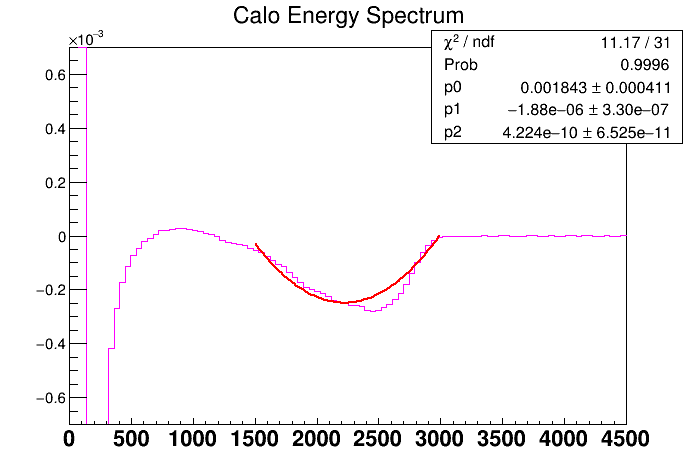

In [6]:
calo_gradient = []
vertex_list = []
wiggle.GetListOfFunctions().Clear()

for i in range(24):
    wiggle.GetZaxis().SetRange(i+1,i+1)
    wiggle.GetYaxis().SetRange(0,300)
    wiggle.GetXaxis().SetRange(0,4500)
#    calo_gradient.append(wiggle.Project3D('y_{}'.format(i+1)).Clone('y_{}'.format(i+1)))
    calo_gradient.append(calo_especs[i].Clone())

for j in range(24):
    c3 = r.TCanvas()
    gradientHist = calo_gradient[j]
    gradientHist.SetName("gradientHist_"+str(j))

    for i in range(gradientHist.GetNbinsX()-2):
        calo_especs[j].GetListOfFunctions().Clear()
        calo_especs[j].GetXaxis().SetRange(0,4500)
        if i == 0:
            gradientHist.SetBinContent(i,0)
        else:
            binContentBefore = calo_especs[j].GetBinContent(i-1)
            binContentAfter = calo_especs[j].GetBinContent(i+1)
            slope = (-1*binContentBefore + binContentAfter) / (2*calo_especs[j].GetBinWidth(i))
            gradientHist.SetBinContent(i,slope)

    gradientHist.GetListOfFunctions().Clear()
    gradientHist.Draw("HIST")
    gradientHist.GetYaxis().SetRangeUser(-.0007,.0007)
    gradientHist.GetXaxis().SetRangeUser(0,4500)

    ding = 'gradientFit'
    gradientFit = r.TF1(ding, 'pol2', 1500,3000)
    gradientFit.SetParameters(0,0,-1)
    gradientHist.Fit(ding,"REMB")
    gradientFit.Draw("SAME")
    
    calo_gradient[j] = gradientHist

    c3.Draw()
    c3.Print("./vertex/"+str(j)+".png")

    vertex = -gradientFit.GetParameter(1)/(2*gradientFit.GetParameter(2))
    vertex_list.append(vertex)

print(vertex_list)

Now we can use the peaks we found to get a better fit region... Or something.

[(-0.00018971727515603183, 2.679655670940187e-07, 2883.521875536584, 0.7817879331583022, 1), (-0.00028489232141480853, 4.84101285630398e-07, 2737.854376048288, 1.0782347700086456, 2), (-0.0002830424370940821, 4.0200583204882203e-07, 2764.254587229305, 0.808987153167259, 3), (-0.000264901912052785, 3.648093709215371e-07, 2767.7630737391946, 0.7258480761573709, 4), (-0.00029231733621452156, 5.378535251729532e-07, 2811.7838922526516, 1.4732459944089327, 5), (-0.00027470255484800325, 4.6341500368467106e-07, 2765.4341704553744, 0.9287755124974589, 6), (-0.00023594513681107212, 3.9998478954380465e-07, 2802.3563967754394, 0.9194005500978015, 7), (-0.0002802832556089762, 3.732413123982099e-07, 2755.4527784231464, 0.6850420011128283, 8), (-0.0002879532883939987, 4.1189099731824916e-07, 2740.5091002623817, 0.7799988614429975, 9), (-0.00023850121340922943, 3.9980296864855654e-07, 2803.1326603522666, 0.9104434861601705, 10), (-0.0002143793394753896, 3.066309444922238e-07, 2849.882832479743, 0.8082

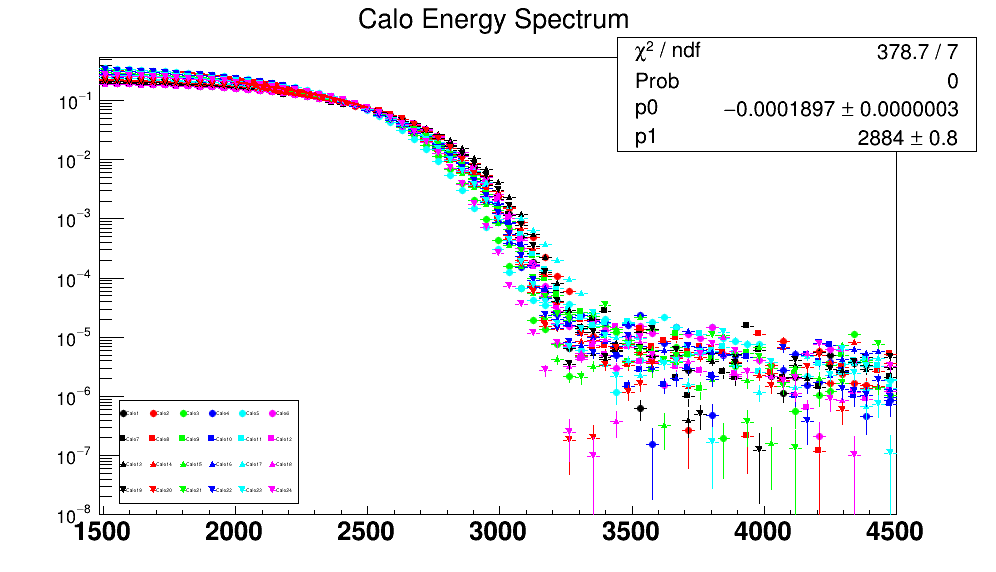

In [7]:
c5 = r.TCanvas('c5','c5',1000,600)
r.gStyle.SetOptStat(0)

fitTupleCorrected = []

leg = r.TLegend(0.12,0.12,0.3,0.3)


for i in range(24):
    endpoint_fit_corrected = r.TF1("endpoint_fit_corrected", '[0]*(x-[1])', vertex_list[i]-200,vertex_list[i]+200)
    calo_especs[i].GetListOfFunctions().Clear()

    if i==0:
        calo_especs[i].Draw('EP')
    else:
        calo_especs[i].Draw('EP same')
  
    calo_especs[i].SetMarkerColor(i%6+1)
    calo_especs[i].SetLineColor(i%6+1)
    if (i%6+1) == 5:
        calo_especs[i].SetMarkerColor(7)
        calo_especs[i].SetLineColor(7)

    calo_especs[i].Scale(1./calo_especs[i].Integral(50,200))
    calo_especs[i].GetYaxis().SetRangeUser(0.00000001,0.542)
    calo_especs[i].GetXaxis().SetRangeUser(1500,4500)

    leg.AddEntry(calo_especs[i], 'Calo{}'.format(i+1), 'lp')
    
    endpoint_fit_corrected.SetParameters(-10,3000)
    calo_especs[i].Fit("endpoint_fit_corrected","R")
    endpoint_fit.Draw("SAME")
    
    fitTupleCorrected.append((endpoint_fit_corrected.GetParameter(0),endpoint_fit_corrected.GetParError(0),endpoint_fit_corrected.GetParameter(1),endpoint_fit_corrected.GetParError(1), i+1))

leg.SetNColumns(6)
leg.Draw()
c5.SetLogy(1)
c5.Draw()

print(fitTupleCorrected)

2883.521875536584
2737.854376048288
2764.254587229305
2767.7630737391946
2811.7838922526516
2765.4341704553744
2802.3563967754394
2755.4527784231464
2740.5091002623817
2803.1326603522666
2849.882832479743
2921.109205437848
2889.2956703568434
2866.7495121511406
2782.735386141837
2762.3636567044227
2830.6257657069286
2900.2414136850107
2833.08980415259
2843.0649301384597
2726.5958628012527
2700.8763288075647
2722.722628987938
2806.782931159545


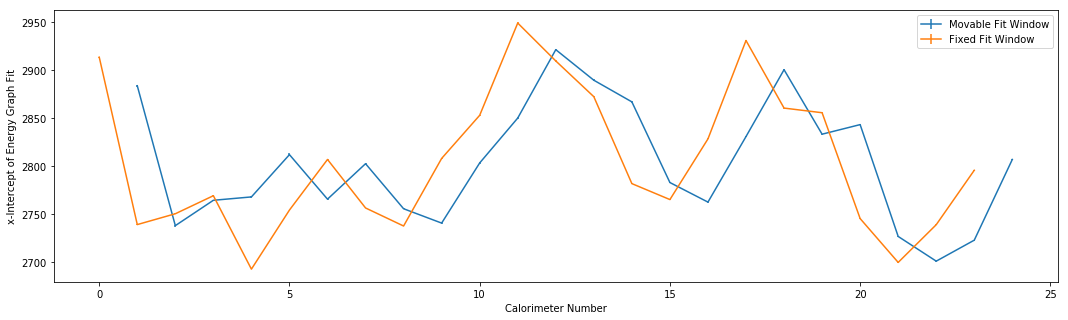

In [8]:
yIntList2 = []
xIntList2 = []
yIntErrorList2 = []
xIntErrorList2 = []
xList2 = []

for entry in fitTupleCorrected:
    yInt = entry[0]*entry[2]*-1
    xInt = entry[2]
    print(xInt)
    yIntList2.append(yInt)
    xIntList2.append(xInt)
    yIntErrorList2.append(entry[1])
    xIntErrorList2.append(entry[3])
    xList2.append(entry[4])
    
fig, ax = plt.subplots(figsize=(18, 5))
ax.errorbar(y=xIntList2,x = xList2,yerr=xIntErrorList2,label='Movable Fit Window')
ax.errorbar(y=xIntList,x = xList,yerr=xIntErrorList, label='Fixed Fit Window')
ax.set_xlabel('Calorimeter Number')
ax.set_ylabel('x-Intercept of Energy Graph Fit')
ax.legend()

plt.show()

In [9]:
'''import csv
out = open('calo_data_output_xIntercept.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['Par0','Par0Err','Par1','Par1Err','CaloNum'])
for item in fitTupleCorrected:
    csv_out.writerow(item)
out.close()'''

Now lets try another method. We can compare this value to the value of the mean of the energy graph between 1000 and 1500 MeV

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


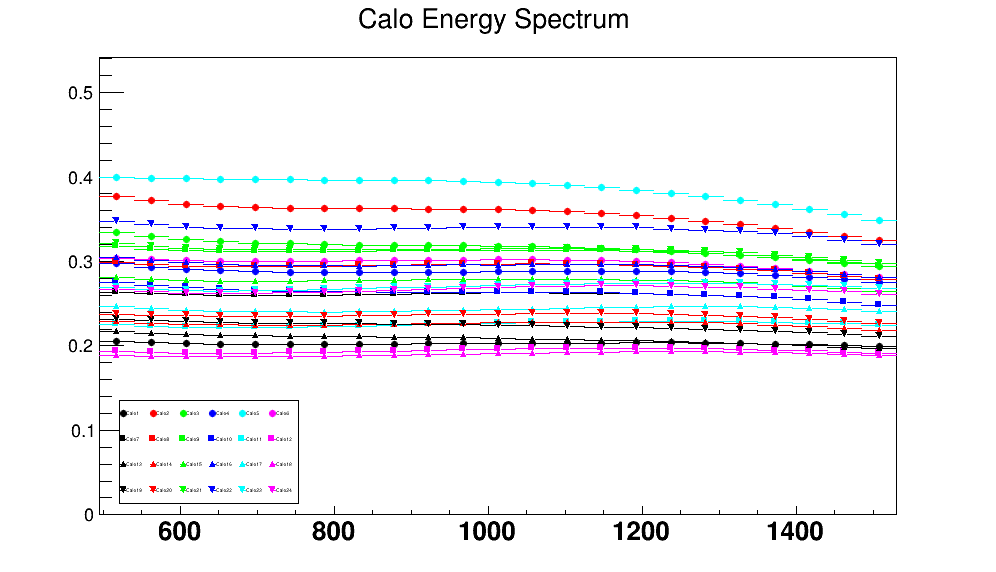

In [34]:
c5 = r.TCanvas('c5','c5',1000,600)
r.gStyle.SetOptStat(0)

meanTupleCorrected = []

leg = r.TLegend(0.12,0.12,0.3,0.3)


for i in range(24):
    calo_especs[i].GetListOfFunctions().Clear()

    if i==0:
        calo_especs[i].Draw('EP')
    else:
        calo_especs[i].Draw('EP same')
  
    calo_especs[i].SetMarkerColor(i%6+1)
    calo_especs[i].SetLineColor(i%6+1)
    if (i%6+1) == 5:
        calo_especs[i].SetMarkerColor(7)
        calo_especs[i].SetLineColor(7)

    calo_especs[i].Scale(1./calo_especs[i].Integral(50,200))
    calo_especs[i].GetYaxis().SetRangeUser(0.00000001,0.542)
    calo_especs[i].GetXaxis().SetRangeUser(500,1500)
    
#    print(calo_especs[i].GetMean(1),calo_especs[i].GetMean(11))

    leg.AddEntry(calo_especs[i], 'Calo{}'.format(i+1), 'lp')
    
    meanTupleCorrected.append((calo_especs[i].GetMean(1),calo_especs[i].GetMean(11), i+1))

leg.SetNColumns(6)
leg.Draw()
#c5.SetLogy(1)
c5.Draw()

#print(meanTupleCorrected)

In [31]:
import csv
out = open('calo_data_output_xMean_500_4500.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['Mean','MeanErr','CaloNum'])
for item in meanTupleCorrected:
    csv_out.writerow(item)
out.close()